In [6]:
import pandas as pd

# Lista de caminhos dos arquivos CSV
csv_file_paths_despesas = [
    "../dados/despesas_pagas_2022/despesas_pagas_candidatos_2022_BRASIL.csv",
    "../dados/despesas_pagas_2018/despesas_pagas_candidatos_2018_BRASIL.csv"
]

# Lista para armazenar os DataFrames temporários
dataframes = []

# Loop para carregar cada arquivo e adicionar uma coluna de origem
for path in csv_file_paths_despesas:
    # Nome único para indicar a origem dos dados
    file_name = path.split('/')[-1].replace('.csv', '')
    df = pd.read_csv(path, sep=';', encoding='latin1')
    df['origem'] = file_name  # Adiciona coluna indicando a origem
    dataframes.append(df)  # Adiciona o DataFrame à lista

# Combinar todos os DataFrames em um único DataFrame
df_despesas_brasil = pd.concat(dataframes, ignore_index=True)


In [8]:
# Lista de caminhos dos arquivos CSV
csv_file_paths_receitas = [
    "../dados/receitas_2018/receitas_candidatos_2018_BRASIL.csv",
    "../dados/receitas_2022/receitas_candidatos_2022_BRASIL.csv"
]

# Lista para armazenar os DataFrames temporários
dataframes = []

# Loop para carregar cada arquivo e adicionar uma coluna de origem
for path in csv_file_paths_receitas:
    # Nome único para indicar a origem dos dados
    file_name = path.split('/')[-1].replace('.csv', '')
    df = pd.read_csv(path, sep=';', encoding='latin1')
    df['origem'] = file_name  # Adiciona coluna indicando a origem
    dataframes.append(df)  # Adiciona o DataFrame à lista

# Combinar todos os DataFrames em um único DataFrame
df_receitas_brasil = pd.concat(dataframes, ignore_index=True)

# Exibir as primeiras linhas do DataFrame combinado
df_receitas_brasil.head()

/tmp/ipykernel_114/505543525.py:14: DtypeWarning: Columns (39,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';', encoding='latin1')


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA,DS_NATUREZA_RECURSO_ESTIMAVEL,DS_GENERO,DS_COR_RACA,origem
0,01/12/2024,09:04:26,2018,2,ORDINÁRIA,297,Eleições Gerais Estaduais 2018,07/10/2018,1,FINAL,...,431110700000AC000010E,51920301291,11839873,23/10/2018,#NULO,"13,20",#NULO,Masculino,Branca,receitas_candidatos_2018_BRASIL
1,01/12/2024,09:04:26,2018,2,ORDINÁRIA,297,Eleições Gerais Estaduais 2018,07/10/2018,1,FINAL,...,431110700000AC000005E,#NULO#,11839872,15/08/2018,DOAÇÃO DE PRESTAÇÃO DE SERVIÇOS NA CAMPANHA,"1000,00",Serviços prestados por terceiros,Masculino,Branca,receitas_candidatos_2018_BRASIL
2,01/12/2024,09:04:26,2018,2,ORDINÁRIA,297,Eleições Gerais Estaduais 2018,07/10/2018,1,FINAL,...,431110700000AC000001E,01,11839867,22/08/2018,#NULO,"15000,00",#NULO,Masculino,Branca,receitas_candidatos_2018_BRASIL
3,01/12/2024,09:04:26,2018,2,ORDINÁRIA,297,Eleições Gerais Estaduais 2018,07/10/2018,1,FINAL,...,430000700000AC000005E,#NULO#,11840314,29/09/2018,GASOMLINA COMUM,"321,65",Combustíveis e lubrificantes,Feminino,Parda,receitas_candidatos_2018_BRASIL
4,01/12/2024,09:04:26,2018,2,ORDINÁRIA,297,Eleições Gerais Estaduais 2018,07/10/2018,1,FINAL,...,430000700000AC000007E,235902359,11840311,28/09/2018,#NULO,"1500,00",#NULO,Feminino,Parda,receitas_candidatos_2018_BRASIL


In [9]:
# Identificar valores duplicados em anos diferentes
duplicados = (
    df_receitas_brasil.groupby('SQ_CANDIDATO')['ANO_ELEICAO']
    .nunique()  # Conta o número de anos únicos para cada nome
    .reset_index()  # Reseta o índice para facilitar a visualização
)

# Filtrar nomes que aparecem em mais de um ano
valores_repetidos = duplicados[duplicados['ANO_ELEICAO'] > 1]

print("Valores que aparecem em anos diferentes:")
print(valores_repetidos)

Valores que aparecem em anos diferentes:
Empty DataFrame
Columns: [SQ_CANDIDATO, ANO_ELEICAO]
Index: []


In [15]:
df_filtrado = df_despesas_brasil[['DS_ELEICAO', 'SG_UF', 'ANO_ELEICAO', 'ST_TURNO', 'SQ_PRESTADOR_CONTAS', 'SQ_DESPESA', 'DS_ORIGEM_DESPESA', 'DS_DESPESA', 'VR_PAGTO_DESPESA']]
df_filtrado.head()

,DS_ELEICAO,SG_UF,ANO_ELEICAO,ST_TURNO,SQ_PRESTADOR_CONTAS,SQ_DESPESA,DS_ORIGEM_DESPESA,DS_DESPESA,VR_PAGTO_DESPESA
0,Eleições Gerais Estaduais 2022,AC,2022,1,3780998626,51917015,"Produção de programas de rádio, televisão ou v...",MARKETING· TRAFEGO PAGO· FOTOGRAFIA· DESIGNER ...,"65000,00"
1,Eleições Gerais Estaduais 2022,AC,2022,1,3780998626,51917015,"Produção de programas de rádio, televisão ou v...",MARKETING· TRAFEGO PAGO· FOTOGRAFIA· DESIGNER ...,"80000,00"
2,Eleições Gerais Estaduais 2022,AC,2022,1,3727953296,51789084,"Produção de programas de rádio, televisão ou v...",PRESTAÇÃO DE SERVIÇO DE CRIAÇÃO DE MATERIAL VI...,"600,00"
3,Eleições Gerais Estaduais 2022,AC,2022,1,3797150932,51884207,"Produção de programas de rádio, televisão ou v...",PRESTAÇÃO DE SERVIÇO DE PRODUÇÃO AUDIOVISUAL,"3000,00"
4,Eleições Gerais Estaduais 2022,AC,2022,1,3790198800,51655268,"Produção de programas de rádio, televisão ou v...",CRIAÇÃO DE POST P REDES SOCIAIS· GER REDES SOCIAI,"40000,00"


In [16]:
print(len(df_filtrado))

4054378


In [17]:
df_filtrado.dtypes

DS_ELEICAO             object
SG_UF                  object
ANO_ELEICAO             int64
ST_TURNO                int64
SQ_PRESTADOR_CONTAS     int64
SQ_DESPESA              int64
DS_ORIGEM_DESPESA      object
DS_DESPESA             object
VR_PAGTO_DESPESA       object
dtype: object

In [18]:
df_filtrado['VR_PAGTO_DESPESA'] = df_filtrado['VR_PAGTO_DESPESA'].str.replace(',', '.').astype('float')

/tmp/ipykernel_114/2952341873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['VR_PAGTO_DESPESA'] = df_filtrado['VR_PAGTO_DESPESA'].str.replace(',', '.').astype('float')


In [19]:
df_agrupado = df_filtrado.groupby('SQ_DESPESA')['VR_PAGTO_DESPESA'].sum().reset_index()
df_agrupado.head()

,SQ_DESPESA,VR_PAGTO_DESPESA
0,17564736,400.0
1,17597293,408.0
2,17597294,550.0
3,17597295,300.0
4,17599117,13.2


In [20]:
df_agrupado_teste = df_agrupado[(df_agrupado['SQ_DESPESA'] == 52177134)]
df_agrupado_teste.head()

,SQ_DESPESA,VR_PAGTO_DESPESA
3075071,52177134,1650.0


In [21]:
df1_filtrado = df_receitas_brasil[['DS_ELEICAO', 'ANO_ELEICAO', 'SG_UF', 'ST_TURNO', 'SQ_CANDIDATO', 'SQ_PRESTADOR_CONTAS', 'DS_CARGO', 'NM_PARTIDO', 'DS_GENERO', 'DS_COR_RACA', 'DS_FONTE_RECEITA', 'DS_ORIGEM_RECEITA', 'DS_NATUREZA_RECEITA', 'DS_NATUREZA_RECURSO_ESTIMAVEL', 'DS_RECEITA', 'VR_RECEITA']]
df1_filtrado.head()

,DS_ELEICAO,ANO_ELEICAO,SG_UF,ST_TURNO,SQ_CANDIDATO,SQ_PRESTADOR_CONTAS,DS_CARGO,NM_PARTIDO,DS_GENERO,DS_COR_RACA,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_NATUREZA_RECEITA,DS_NATUREZA_RECURSO_ESTIMAVEL,DS_RECEITA,VR_RECEITA
0,Eleições Gerais Estaduais 2018,2018,AC,1,10000600129,402109553,Deputado Estadual,Partido Verde,Masculino,Branca,OUTROS RECURSOS,Recursos próprios,FINANCEIRO,#NULO,#NULO,"13,20"
1,Eleições Gerais Estaduais 2018,2018,AC,1,10000600129,402109553,Deputado Estadual,Partido Verde,Masculino,Branca,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Serviços prestados por terceiros,DOAÇÃO DE PRESTAÇÃO DE SERVIÇOS NA CAMPANHA,"1000,00"
2,Eleições Gerais Estaduais 2018,2018,AC,1,10000600129,402109553,Deputado Estadual,Partido Verde,Masculino,Branca,FUNDO ESPECIAL,Recursos de partido político,FINANCEIRO,#NULO,#NULO,"15000,00"
3,Eleições Gerais Estaduais 2018,2018,AC,1,10000600130,402109554,Deputado Estadual,Partido Verde,Feminino,Parda,FUNDO ESPECIAL,Recursos de partido político,ESTIMÁVEL,Combustíveis e lubrificantes,GASOMLINA COMUM,"321,65"
4,Eleições Gerais Estaduais 2018,2018,AC,1,10000600130,402109554,Deputado Estadual,Partido Verde,Feminino,Parda,FUNDO ESPECIAL,Recursos de outros candidatos,FINANCEIRO,#NULO,#NULO,"1500,00"


In [22]:
df1_filtrado_teste = df1_filtrado[(df1_filtrado['SQ_PRESTADOR_CONTAS'] == 3763825747)]

df1_filtrado_teste.head()

,DS_ELEICAO,ANO_ELEICAO,SG_UF,ST_TURNO,SQ_CANDIDATO,SQ_PRESTADOR_CONTAS,DS_CARGO,NM_PARTIDO,DS_GENERO,DS_COR_RACA,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_NATUREZA_RECEITA,DS_NATUREZA_RECURSO_ESTIMAVEL,DS_RECEITA,VR_RECEITA
908952,Eleições Gerais Estaduais 2022,2022,RN,1,200001603652,3763825747,Deputado Federal,Partido dos Trabalhadores,Feminino,Branca,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,#NULO,#NULO,"500,00"
908953,Eleições Gerais Estaduais 2022,2022,RN,1,200001603652,3763825747,Deputado Federal,Partido dos Trabalhadores,Feminino,Branca,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Cessão ou locação de veículos,VECTRA GLS - ANO 1997,"1000,00"
908954,Eleições Gerais Estaduais 2022,2022,RN,1,200001603652,3763825747,Deputado Federal,Partido dos Trabalhadores,Feminino,Branca,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Cessão ou locação de veículos,CESSÃO VEÍCULO FORD KA - ANO 2010,"1500,00"
908955,Eleições Gerais Estaduais 2022,2022,RN,1,200001603652,3763825747,Deputado Federal,Partido dos Trabalhadores,Feminino,Branca,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Cessão ou locação de veículos,CESSÃO VEÍCULO CHEVROLET CORSA WIND - ANO 2000,"1000,00"
908956,Eleições Gerais Estaduais 2022,2022,RN,1,200001603652,3763825747,Deputado Federal,Partido dos Trabalhadores,Feminino,Branca,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Cessão ou locação de veículos,CESSÃO VEÍCULO FIAT PALIO - ANO 2016,"750,00"


In [23]:
# Criar um dicionário de mapeamento
mapeamento = dict(zip(df1_filtrado['SQ_PRESTADOR_CONTAS'], df1_filtrado['DS_CARGO']))

# Mapear os valores da coluna 'codigo' em df_a para 'descricao'
df_filtrado['DS_CARGO'] = df_filtrado['SQ_PRESTADOR_CONTAS'].map(mapeamento)

/tmp/ipykernel_114/3959928142.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['DS_CARGO'] = df_filtrado['SQ_PRESTADOR_CONTAS'].map(mapeamento)


In [24]:
# Criar um dicionário de mapeamento
mapeamento1 = dict(zip(df1_filtrado['SQ_PRESTADOR_CONTAS'], df1_filtrado['NM_PARTIDO']))

# Mapear os valores da coluna 'codigo' em df_a para 'descricao'
df_filtrado['NM_PARTIDO'] = df_filtrado['SQ_PRESTADOR_CONTAS'].map(mapeamento1)

/tmp/ipykernel_114/1567955681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['NM_PARTIDO'] = df_filtrado['SQ_PRESTADOR_CONTAS'].map(mapeamento1)


In [25]:
# Criar um dicionário de mapeamento
mapeamento2 = dict(zip(df1_filtrado['SQ_PRESTADOR_CONTAS'], df1_filtrado['DS_GENERO']))

# Mapear os valores da coluna 'codigo' em df_a para 'descricao'
df_filtrado['DS_GENERO'] = df_filtrado['SQ_PRESTADOR_CONTAS'].map(mapeamento2)

/tmp/ipykernel_114/4064518396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['DS_GENERO'] = df_filtrado['SQ_PRESTADOR_CONTAS'].map(mapeamento2)


In [26]:
# Criar um dicionário de mapeamento
mapeamento3 = dict(zip(df1_filtrado['SQ_PRESTADOR_CONTAS'], df1_filtrado['SQ_CANDIDATO']))

# Mapear os valores da coluna 'codigo' em df_a para 'descricao'
df_filtrado['SQ_CANDIDATO'] = df_filtrado['SQ_PRESTADOR_CONTAS'].map(mapeamento3)

/tmp/ipykernel_114/1280406835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['SQ_CANDIDATO'] = df_filtrado['SQ_PRESTADOR_CONTAS'].map(mapeamento3)


In [28]:
df_filtrado.head()

,DS_ELEICAO,SG_UF,ANO_ELEICAO,ST_TURNO,SQ_PRESTADOR_CONTAS,SQ_DESPESA,DS_ORIGEM_DESPESA,DS_DESPESA,VR_PAGTO_DESPESA,DS_CARGO,NM_PARTIDO,DS_GENERO,SQ_CANDIDATO
0,Eleições Gerais Estaduais 2022,AC,2022,1,3780998626,51917015,"Produção de programas de rádio, televisão ou v...",MARKETING· TRAFEGO PAGO· FOTOGRAFIA· DESIGNER ...,65000.0,Deputado Federal,UNIÃO BRASIL,Feminino,10001612489
1,Eleições Gerais Estaduais 2022,AC,2022,1,3780998626,51917015,"Produção de programas de rádio, televisão ou v...",MARKETING· TRAFEGO PAGO· FOTOGRAFIA· DESIGNER ...,80000.0,Deputado Federal,UNIÃO BRASIL,Feminino,10001612489
2,Eleições Gerais Estaduais 2022,AC,2022,1,3727953296,51789084,"Produção de programas de rádio, televisão ou v...",PRESTAÇÃO DE SERVIÇO DE CRIAÇÃO DE MATERIAL VI...,600.0,Deputado Federal,Rede Sustentabilidade,Masculino,10001595345
3,Eleições Gerais Estaduais 2022,AC,2022,1,3797150932,51884207,"Produção de programas de rádio, televisão ou v...",PRESTAÇÃO DE SERVIÇO DE PRODUÇÃO AUDIOVISUAL,3000.0,Deputado Federal,Podemos,Masculino,10001655719
4,Eleições Gerais Estaduais 2022,AC,2022,1,3790198800,51655268,"Produção de programas de rádio, televisão ou v...",CRIAÇÃO DE POST P REDES SOCIAIS· GER REDES SOCIAI,40000.0,Deputado Estadual,UNIÃO BRASIL,Feminino,10001623535


In [29]:
print(len(df_filtrado))
print(len(df1_filtrado))
#print(len(df2_filtrado))

4054378
1004189


In [30]:
df_filtrado_teste = df_filtrado[(df_filtrado['SQ_CANDIDATO'] == 200001608810)]

df_filtrado_teste.head()

,DS_ELEICAO,SG_UF,ANO_ELEICAO,ST_TURNO,SQ_PRESTADOR_CONTAS,SQ_DESPESA,DS_ORIGEM_DESPESA,DS_DESPESA,VR_PAGTO_DESPESA,DS_CARGO,NM_PARTIDO,DS_GENERO,SQ_CANDIDATO
1660633,Eleições Gerais Estaduais 2022,RN,2022,1,3778704682,51048369,"Produção de programas de rádio, televisão ou v...",PRODUÇÃO· GRAVAÇÃO· EDIÇÃO E FINALIZAÇÃO DOS P...,650000.0,Governador,Partido dos Trabalhadores,Feminino,200001608810
1660634,Eleições Gerais Estaduais 2022,RN,2022,1,3778704682,51048369,"Produção de programas de rádio, televisão ou v...",PRODUÇÃO· GRAVAÇÃO· EDIÇÃO E FINALIZAÇÃO DOS P...,800000.0,Governador,Partido dos Trabalhadores,Feminino,200001608810
1660635,Eleições Gerais Estaduais 2022,RN,2022,1,3778704682,51048369,"Produção de programas de rádio, televisão ou v...",PRODUÇÃO· GRAVAÇÃO· EDIÇÃO E FINALIZAÇÃO DOS P...,600000.0,Governador,Partido dos Trabalhadores,Feminino,200001608810
1660636,Eleições Gerais Estaduais 2022,RN,2022,1,3778704682,51048369,"Produção de programas de rádio, televisão ou v...",PRODUÇÃO· GRAVAÇÃO· EDIÇÃO E FINALIZAÇÃO DOS P...,524000.0,Governador,Partido dos Trabalhadores,Feminino,200001608810
1660637,Eleições Gerais Estaduais 2022,RN,2022,1,3778704682,51048532,"Produção de programas de rádio, televisão ou v...",PRESTAÇÃO DE SERVIÇO DE DEGRAVAÇÃO DOS PROGRAM...,190000.0,Governador,Partido dos Trabalhadores,Feminino,200001608810


In [31]:
# Lista de cargos a serem removidos
cargos_indesejados = ['Deputado Distrital', '2º Suplente', 'Vice-governador', 'Presidente']
df_filtrado = df_filtrado[
    (df_filtrado['ANO_ELEICAO'] == 2022) & 
    (~df_filtrado['DS_CARGO'].isin(cargos_indesejados))
].copy()

In [32]:
print(df_filtrado_teste.shape[0])

258


In [33]:
df_filtrado.dtypes

DS_ELEICAO              object
SG_UF                   object
ANO_ELEICAO              int64
ST_TURNO                 int64
SQ_PRESTADOR_CONTAS      int64
SQ_DESPESA               int64
DS_ORIGEM_DESPESA       object
DS_DESPESA              object
VR_PAGTO_DESPESA       float64
DS_CARGO                object
NM_PARTIDO              object
DS_GENERO               object
SQ_CANDIDATO             int64
dtype: object

In [34]:
analise1_estados_distintos = df_filtrado['SG_UF'].unique()
print("Valores distintos:", analise1_estados_distintos)

Valores distintos: ['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


### 1ª Análise utiliza as seguintes variáveis: DS_ORIGEM_DESPESA, VR_PAGTO_DESPESA, DS_GENERO, DS_CARGO

In [35]:
analise1_total_despesa_distintos = df_filtrado['DS_ORIGEM_DESPESA'].nunique()
analise1_valores_despesa_distintos = df_filtrado['DS_ORIGEM_DESPESA'].unique()

print(f"Total de valores distintos: {analise1_total_despesa_distintos}")
print("Valores distintos:", analise1_valores_despesa_distintos)


Total de valores distintos: 41
Valores distintos: ['Produção de programas de rádio, televisão ou vídeo' 'Energia elétrica'
 'Serviços advocatícios' 'Despesas com Hospedagem'
 'Criação e inclusão de páginas na internet'
 'Impostos, contribuições e taxas' 'Publicidade por materiais impressos'
 'Combustíveis e lubrificantes' 'Produção de jingles, vinhetas e slogans'
 'Publicidade por carros de som'
 'Pré-instalação física de comitê de campanha' 'Telefone'
 'Diversas a especificar' 'Serviços próprios prestados por terceiros'
 'Aquisição/Doação de bens móveis ou imóveis'
 'Despesas com transporte ou deslocamento' 'Serviços contábeis'
 'Correspondências e despesas postais'
 'Doações financeiras a outros candidatos/partidos'
 'Cessão ou locação de veículos' 'Locação/cessão de bens imóveis'
 'Serviços prestados por terceiros'
 'Locação/cessão de bens móveis (exceto veículos)'
 'Encargos financeiros, taxas bancárias e/ou op. cartão de crédito'
 'Passagem Aérea' 'Taxa de Administração de Financi

In [36]:
analise1_total_cargo_distintos = df_filtrado['DS_CARGO'].nunique()
analise1_valores_cargo_distintos = df_filtrado['DS_CARGO'].unique()

print(f"Total de valores distintos: {analise1_total_cargo_distintos}")
print("Valores distintos:", analise1_valores_cargo_distintos)

Total de valores distintos: 4
Valores distintos: ['Deputado Federal' 'Deputado Estadual' 'Governador' 'Senador']


In [37]:
valor_gasto_despesa = df_filtrado.groupby('DS_ORIGEM_DESPESA')['VR_PAGTO_DESPESA'].sum().reset_index()
# Obter os 5 maiores
#top_5 = valor_gasto_despesa.nlargest(5, 'valor')

# Exibir o resultado
#print(top_5)

# Ordenar em ordem decrescente
valor_gasto_despesa = valor_gasto_despesa.sort_values(by='VR_PAGTO_DESPESA', ascending=False)

print(valor_gasto_despesa)

                                    DS_ORIGEM_DESPESA  VR_PAGTO_DESPESA
32                Publicidade por materiais impressos      1.137528e+09
2       Atividades de militância e mobilização de rua      7.716420e+08
11                               Despesas com pessoal      7.444585e+08
36                   Serviços prestados por terceiros      6.686676e+08
29                           Publicidade por adesivos      3.789775e+08
27  Produção de programas de rádio, televisão ou v...      3.550446e+08
8            Despesa com Impulsionamento de Conteúdos      3.002307e+08
3                       Cessão ou locação de veículos      2.129519e+08
34                              Serviços advocatícios      2.050871e+08
14   Doações financeiras a outros candidatos/partidos      1.633798e+08
4                        Combustíveis e lubrificantes      1.318768e+08
35                                 Serviços contábeis      1.129405e+08
13                             Diversas a especificar      1.046

In [38]:
# Agrupar por Cargo e Estado, somando os valores de despesas
valor_gasto_despesa_CARGO_ESTADO_GENERO = df_filtrado.groupby(['DS_CARGO', 'SG_UF', 'DS_GENERO'])['VR_PAGTO_DESPESA'].sum().reset_index()

# Ordenar em ordem decrescente pelo valor gasto de despesa
valor_gasto_despesa_CARGO_ESTADO_GENERO = valor_gasto_despesa_CARGO_ESTADO_GENERO.sort_values(by='VR_PAGTO_DESPESA', ascending=False)

# Exibir o resultado
print(valor_gasto_despesa_CARGO_ESTADO_GENERO)


              DS_CARGO SG_UF  DS_GENERO  VR_PAGTO_DESPESA
103   Deputado Federal    SP  Masculino      3.318773e+08
73    Deputado Federal    MG  Masculino      2.267247e+08
49   Deputado Estadual    SP  Masculino      1.756964e+08
89    Deputado Federal    RJ  Masculino      1.718282e+08
61    Deputado Federal    BA  Masculino      1.379183e+08
..                 ...   ...        ...               ...
197            Senador    SP   Feminino      5.344688e+04
143         Governador    RS   Feminino      5.007250e+04
175            Senador    PA   Feminino      3.100000e+04
136         Governador    RJ   Feminino      1.268940e+04
126         Governador    PA   Feminino      8.300000e+03

[201 rows x 4 columns]


In [39]:
valor_gasto_despesa_GENERO = df_filtrado.groupby('DS_GENERO')['VR_PAGTO_DESPESA'].sum().reset_index()

# Ordenar em ordem decrescente
valor_gasto_despesa_GENERO = valor_gasto_despesa_GENERO.sort_values(by='VR_PAGTO_DESPESA', ascending=False)

print(valor_gasto_despesa_GENERO)

   DS_GENERO  VR_PAGTO_DESPESA
1  Masculino      4.203643e+09
0   Feminino      1.589319e+09


In [40]:
contagem_genero = df_filtrado.groupby('DS_GENERO')['SQ_PRESTADOR_CONTAS'].count().reset_index(name='quantidade')
print(contagem_genero)


   DS_GENERO  quantidade
0   Feminino      723421
1  Masculino     1638756


In [42]:
df_filtrado.to_csv('../prestacao_contas_eleitorais_despesas_receitas.csv', index=False)

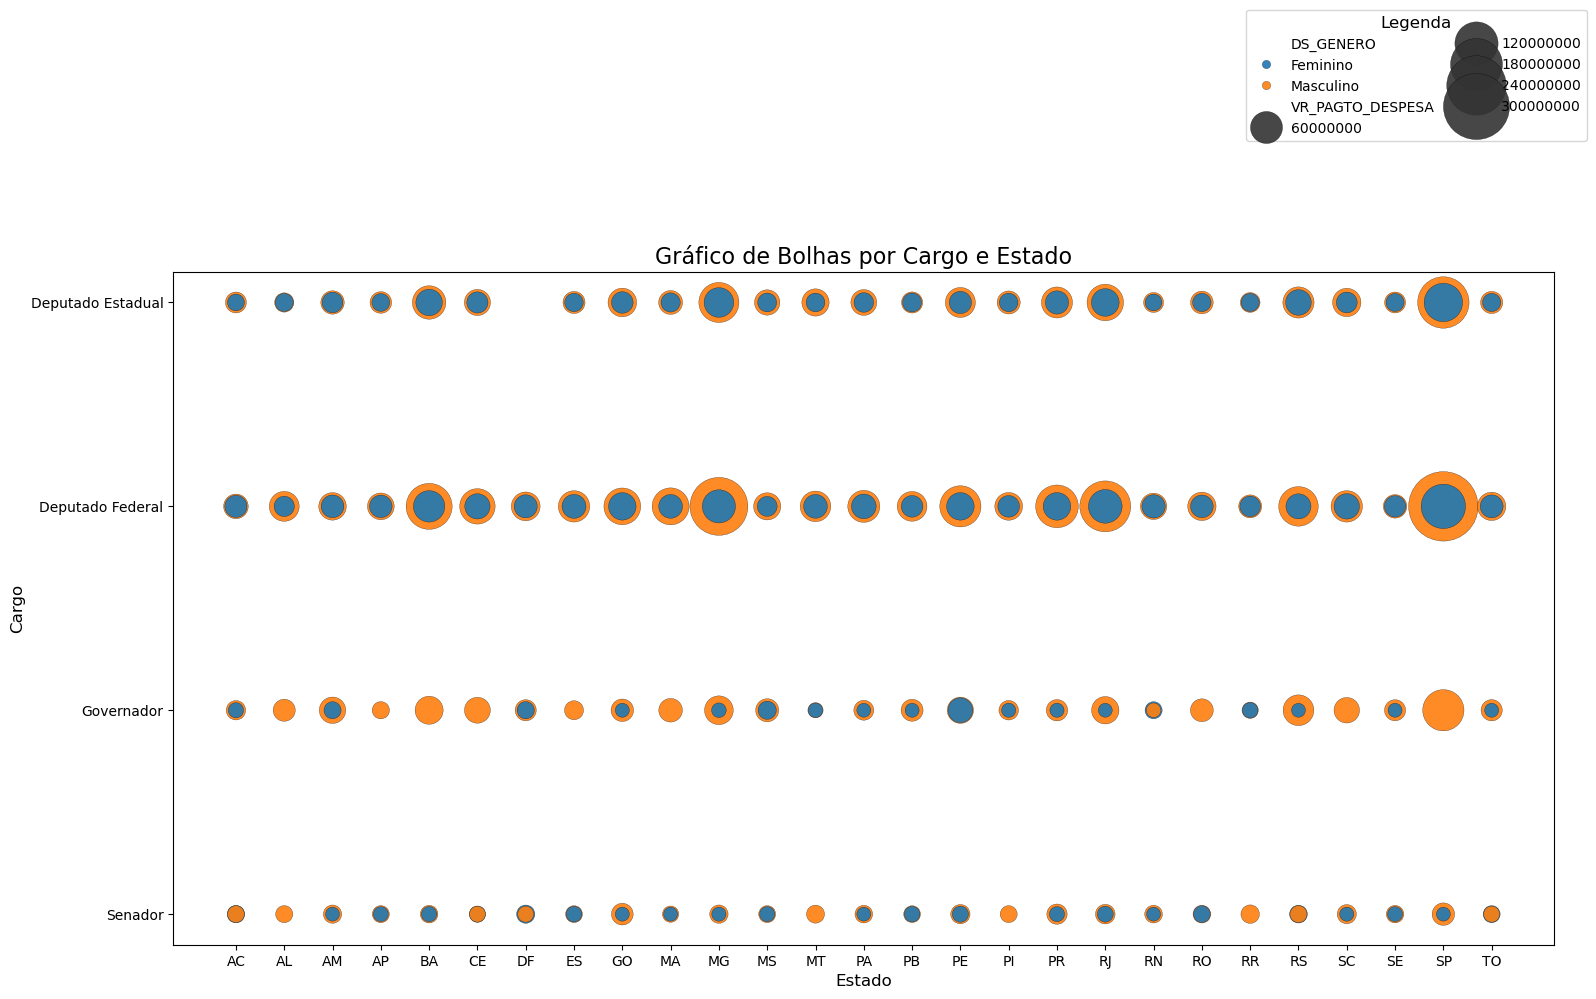

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ordenar o DataFrame para desenhar os menores círculos por último
df_filtrado = valor_gasto_despesa_CARGO_ESTADO_GENERO.sort_values(by='VR_PAGTO_DESPESA', ascending=False)

# Garantir que as variáveis categóricas sejam interpretadas corretamente
df_filtrado['DS_CARGO'] = df_filtrado['DS_CARGO'].astype('category')
df_filtrado['SG_UF'] = df_filtrado['SG_UF'].astype('category')
df_filtrado['DS_GENERO'] = df_filtrado['DS_GENERO'].astype('category')

# Criar o gráfico de bolhas com categorias no eixo Y
plt.figure(figsize=(16, 8))  # Aumentar o tamanho da figura
bubble_chart = sns.scatterplot(
    data=df_filtrado,
    x='SG_UF',
    y='DS_CARGO',
    size='VR_PAGTO_DESPESA',
    hue='DS_GENERO',
    sizes=(100, 2500),  # Intervalo menor para os tamanhos das bolhas
    alpha=0.9,  # Tornar as bolhas mais sólidas
    edgecolor="black",  # Borda preta para distinguir as bolhas
    linewidth=0.2  # Espessura da borda
)

# Personalizar o gráfico
plt.title('Gráfico de Bolhas por Cargo e Estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Cargo', fontsize=12)

# Ajustar a rotação e o alinhamento dos rótulos do eixo X
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Ajustar espaçamento entre os eixos
plt.tight_layout(pad=2.0)

# Adicionar a legenda acima e à direita
plt.legend(
    title='Legenda', 
    fontsize=10, 
    title_fontsize=12, 
    loc='upper center', 
    bbox_to_anchor=(0.9, 1.4),  # Posiciona acima e à direita
    ncol=2  # Número de colunas na legenda
)

# Exibir o gráfico
plt.show()

In [46]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 8.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.1 MB/s eta 0:00:0000:01


In [48]:
df_grafico = df_filtrado

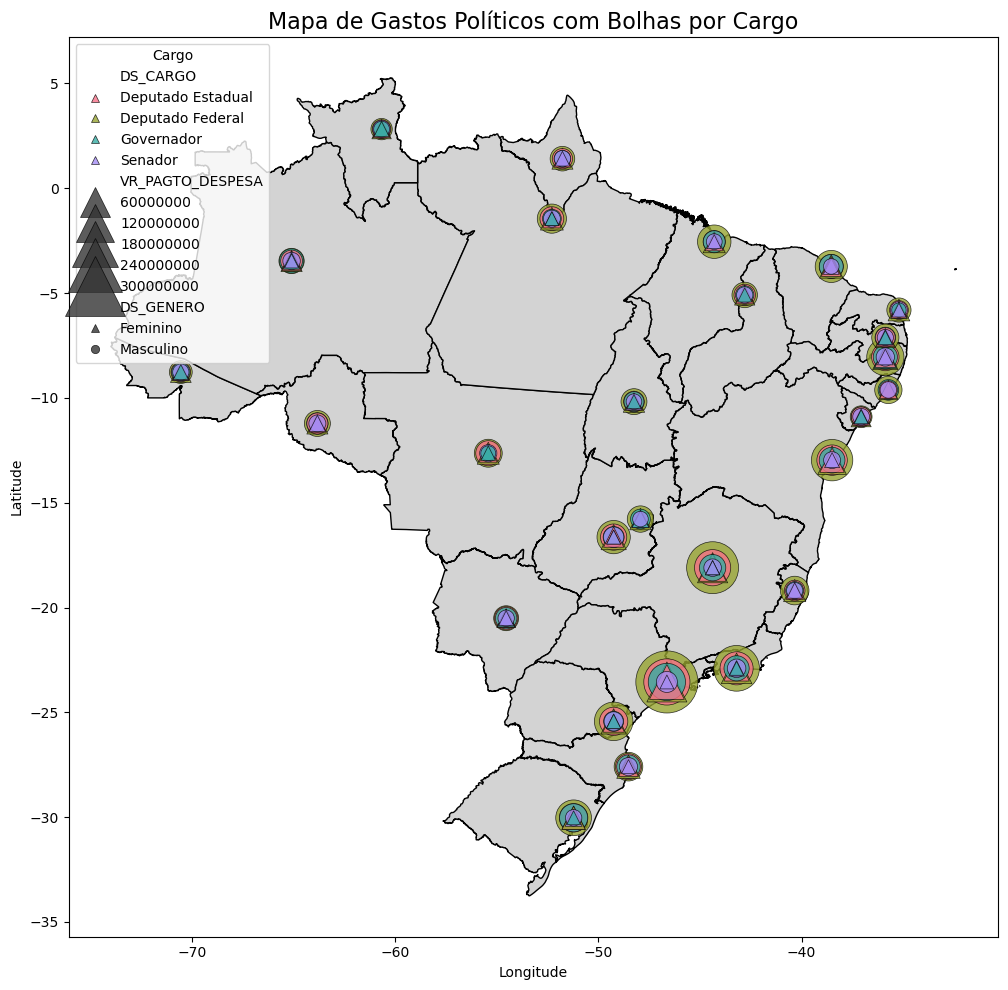

In [49]:
import geopandas as gpd
import requests

# Coordenadas fictícias aproximadas dos estados
coordinates = {
    "SP": [-46.63, -23.55], "RJ": [-43.20, -22.90], "MG": [-44.38, -18.10], "BA": [-38.50, -12.97],
    "RS": [-51.22, -30.03], "PR": [-49.25, -25.43], "SC": [-48.52, -27.59], "PE": [-35.88, -8.05],
    "CE": [-38.54, -3.73], "PA": [-52.29, -1.45], "MA": [-44.30, -2.55], "GO": [-49.25, -16.64],
    "AM": [-65.10, -3.47], "ES": [-40.34, -19.19], "PB": [-35.88, -7.12], "RN": [-35.21, -5.81],
    "AL": [-35.73, -9.62], "PI": [-42.80, -5.09], "MT": [-55.42, -12.64], "MS": [-54.54, -20.51],
    "SE": [-37.07, -10.90], "RO": [-63.83, -11.22], "TO": [-48.25, -10.18], "AP": [-51.77, 1.41],
    "AC": [-70.55, -8.77], "RR": [-60.67, 2.82], "DF": [-47.93, -15.78]
}

df_grafico["lon"] = df_filtrado["SG_UF"].map(lambda x: coordinates[x][0])
df_grafico["lat"] = df_filtrado["SG_UF"].map(lambda x: coordinates[x][1])

# Carregar o GeoJSON do Brasil
url_geojson = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
response = requests.get(url_geojson)
geojson = response.json()

# Transformar o GeoJSON em GeoDataFrame
brasil_map = gpd.GeoDataFrame.from_features(geojson["features"])

# Garantir que a projeção está correta
brasil_map = brasil_map.set_crs("EPSG:4326")  # WGS 84 (padrão global)

# Plotar o mapa do Brasil
fig, ax = plt.subplots(figsize=(14, 10))

# Desenhar o mapa com contornos dos estados
brasil_map.plot(ax=ax, color="lightgrey", edgecolor="black")

sns.scatterplot(
    data=df_grafico,
    x="lon",
    y="lat",
    size="VR_PAGTO_DESPESA",
    hue="DS_CARGO",
    style="DS_GENERO",  # Diferenciar forma pelo gênero
    sizes=(100, 2000),
    markers={"Masculino": "o", "Feminino": "^"},  # Círculo e Triângulo
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    palette="husl",  # Paleta de cores para os cargos
    legend="brief"
)
# Inverter o eixo Y para corrigir a orientação
plt.gca().invert_yaxis()

# Títulos e ajustes
plt.title('Mapa de Gastos Políticos com Bolhas por Cargo', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title="Cargo", loc='upper left')

# Melhorar layout
plt.tight_layout()
plt.show()

In [50]:
df_grafico.head()

,DS_CARGO,SG_UF,DS_GENERO,VR_PAGTO_DESPESA,lon,lat
103,Deputado Federal,SP,Masculino,3.318773e+08,-46.63,-23.55
73,Deputado Federal,MG,Masculino,2.267247e+08,-44.38,-18.10
49,Deputado Estadual,SP,Masculino,1.756964e+08,-46.63,-23.55
89,Deputado Federal,RJ,Masculino,1.718282e+08,-43.20,-22.90
61,Deputado Federal,BA,Masculino,1.379183e+08,-38.50,-12.97


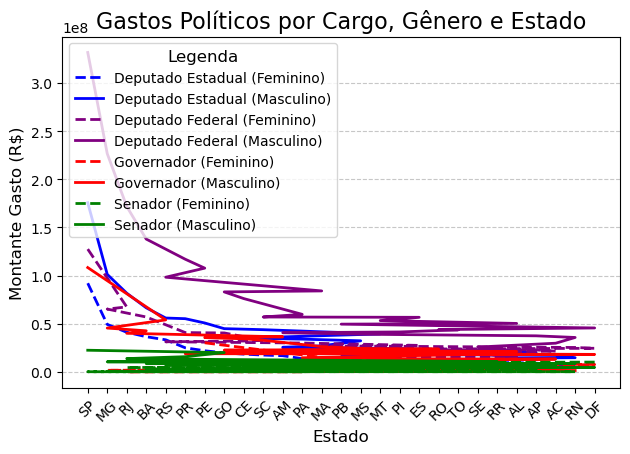

In [51]:
# Configurar cores para cada cargo
cargo_cores = {"Deputado Estadual": "blue", "Deputado Federal": "purple", "Governador": "red", "Senador": "green"}

ordem_estados = [
    "AC", "AL", "AP", "AM", "BA", "CE", "DF", "ES", "GO", "MA", "MT", "MS", "MG",
    "PA", "PB", "PR", "PE", "PI", "RJ", "RN", "RO", "RR", "RS", "SC", "SE", "SP", "TO"
]

# Garantir que a coluna "SG_UF" siga a ordem definida
df_grafico["SG_UF"] = pd.Categorical(df_grafico["SG_UF"], categories=ordem_estados, ordered=True)

# Iterar por cada combinação de cargo e gênero
for (cargo, genero), group in df_grafico.groupby(["DS_CARGO", "DS_GENERO"]):
    # Escolher o estilo da linha
    linestyle = "-" if genero == "Masculino" else "--"  # Contínua para masculino, pontilhada para feminino
    
    # Plotar as linhas
    plt.plot(
        group["SG_UF"],  # Eixo X: Estados
        group["VR_PAGTO_DESPESA"],  # Eixo Y: Montante gasto
        label=f"{cargo} ({genero})",  # Rótulo da legenda
        color=cargo_cores[cargo],  # Cor baseada no cargo
        linestyle=linestyle,  # Estilo da linha
        linewidth=2  # Largura da linha
    )

# Adicionar uma grade horizontal
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Personalizar o gráfico
plt.title("Gastos Políticos por Cargo, Gênero e Estado", fontsize=16)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Montante Gasto (R$)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotacionar rótulos do eixo X
plt.yticks(fontsize=10)
plt.legend(title="Legenda", fontsize=10, title_fontsize=12, loc="upper left")

# Melhorar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()